# Analysis of DNB and Mband

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as dis
from PIL import Image

In [17]:
def show_byte_img(arr, name='temp.png', **args):
    clip_lo, clip_hi = np.array([np.sum(arr < 0), np.sum(arr > 256)]) * 100 / arr.size
    print(f'clipping low/high: {clip_lo:.1f}% {clip_hi:.1f}%')
    b = arr.clip(min=0, max=255).astype('uint8')
    Image.fromarray(b).save(name)
    dis.display(dis.Image(name, **args))

def standardize(arr, mean=150, std_dev=50, invert=1):
    norm = (arr - arr.mean()) / arr.std()
    return (norm * invert * std_dev) + mean

def scale(arr, percent_tail=2, percent_top=None, invert=False):
    left, right = (percent_tail/2, percent_tail/2) if percent_top is None \
                  else (percent_tail, percent_top)
    norm = (arr - arr.mean()) / arr.std()
    normi = norm * (1 if not invert else -1)
    sort_arr = np.sort(normi.flatten())
    left, right = int(sort_arr.size * left / 100), int(sort_arr.size * right / 100)
    print(f'left={left} right={right}')
    lo, hi = sort_arr[left], sort_arr[-(1 + right)]
    byte_scale = 256 / (hi - lo)
    offset = 0 - lo * byte_scale
    print(f'byte_scale={byte_scale:.2f} offset={offset:.2f}')
    return (normi * byte_scale) + offset

In [4]:
K = np.array(range(10))
len(K), K.size, K[0], K[-1], K[-(1 + 0)]

(10, 10, 0, 9, 9)

left=2000 right=4700
byte_scale=229.51 offset=235.34
clipping low/high: 20.0% 47.0%


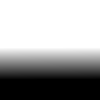

In [5]:
x = np.array(range(500 * 500)).reshape(500, 500)
show_byte_img(scale(x[:100,:100], 20, 47, invert=True), name='progression.png', width=200)

In [6]:
case = np.load('colocated/d20190320_t1358170.npz')
case.files, case['DNB'].shape

(['latitude',
  'longitude',
  'DNB',
  'M12',
  'M13',
  'M14',
  'M15',
  'M16',
  'channels',
  'filenames'],
 (3056, 4056))

0.56302977 7.3425193 10.813722 44.738556


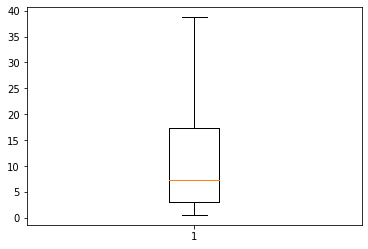

In [7]:
x = case['DNB'] * 1e5
print(x.min(), np.median(x), x.mean(), x.max())
plt.boxplot(x.flatten(), sym='');

In [ ]:
show_byte_img(standardize(case['DNB'], mean=75, std_dev=70), name='dnb.png', width=500)

In [ ]:
show_byte_img(scale(case['DNB']), name='dnb-tiny.png', width=800)

In [ ]:
show_byte_img(scale(case['M12'], 70, 0, invert=True), name='m12.png', width=500)

In [ ]:
show_byte_img(scale(case['M12'], 2, 20, invert=True), name='m12.png', width=500)

In [303]:
dnb_sorted = np.sort(case['DNB'].flatten())
dnb_sorted.shape

(12395136,)

In [305]:
dnb_sorted[:10], dnb_sorted[-10:]

(array([5.6302979e-06, 6.8144286e-06, 7.1925883e-06, 7.5080002e-06,
        7.7462873e-06, 7.8164130e-06, 7.9259507e-06, 7.9647753e-06,
        8.0969849e-06, 8.3502346e-06], dtype=float32),
 array([0.00043464, 0.00043621, 0.00043845, 0.00043993, 0.0004401 ,
        0.00044254, 0.00044261, 0.00044519, 0.00044676, 0.00044739],
       dtype=float32))

In [20]:
x = case['M12']
x.min(), x.mean(), x.max(), x.std()

(203.0, 281.4947, 297.66846, 17.510538)

In [44]:
mbands = [f'M{i}' for i in range(12, 17)]
cols = [case[m].flatten() for m in mbands]

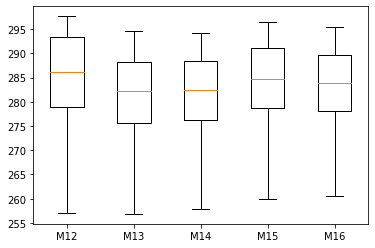

In [45]:
plt.boxplot(cols, labels=mbands, sym='');

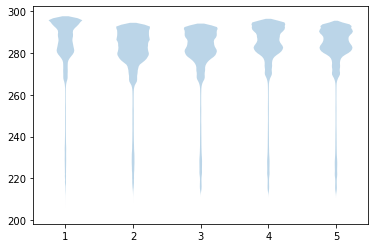

In [301]:
plt.violinplot(cols, showextrema=False);

In [411]:
chs = [case[c].flatten() for c in ('DNB', 'M12', 'M13', 'M14', 'M15', 'M16')]
all_ch = np.column_stack(chs)
mean_std = np.vstack([all_ch.mean(axis=0), all_ch.std(axis=0)])
mean_std

array([[1.0143905e-04, 2.5958252e+02, 2.5728378e+02, 2.5715692e+02,
        2.5858887e+02, 2.5780667e+02],
       [9.0887945e-05, 2.7890348e+01, 2.6460028e+01, 2.6671478e+01,
        2.7641146e+01, 2.7298231e+01]], dtype=float32)

In [424]:
all_ch.astype('float64').mean(axis=0), all_ch.mean(axis=0)

(array([1.08137216e-04, 2.81494807e+02, 2.77840813e+02, 2.77772571e+02,
        2.79918395e+02, 2.78932502e+02]),
 array([1.0143905e-04, 2.5958252e+02, 2.5728378e+02, 2.5715692e+02,
        2.5858887e+02, 2.5780667e+02], dtype=float32))

In [421]:
x = case['DNB'].flatten()
x_mean, x_std = x.mean(), x.std()
print(x_mean, x_std)
x_norm = (x - x_mean) / x_std
print(x_norm.mean(), x_norm.std())

0.00010813728 8.966466e-05
-8.421528e-07 0.9999999


In [425]:
for c in ('DNB', 'M12', 'M13', 'M14', 'M15', 'M16'):
    x = case[c].flatten().astype('float64')
    x_mean, x_std = x.mean(), x.std()
    print(f'{c} mean/std: {x_mean} {x_std}')
    x_norm = (x - x_mean) / x_std
    print(f'{c} norm mean/std: {x_norm.mean()} {x_norm.std()}')

DNB mean/std: 0.00010813721630061075 8.96646570185241e-05
DNB norm mean/std: 1.1893191206100482e-16 0.9999999999999998
M12 mean/std: 281.49480722192476 17.51054045297888
M12 norm mean/std: 1.1087257134009752e-15 1.0000000000000016
M13 mean/std: 277.84081289643564 16.636016105909622
M13 norm mean/std: 4.505370493024329e-16 0.9999999999999993
M14 mean/std: 277.77257095031916 17.21094943168207
M14 norm mean/std: 1.2179170771000777e-15 0.9999999999999984
M15 mean/std: 279.9183951718056 17.940276663618054
M15 norm mean/std: 1.2700180045669195e-15 0.9999999999999997
M16 mean/std: 278.9325022505445 17.76094501685605
M16 norm mean/std: 8.587274773365958e-16 0.9999999999999991


In [433]:
def normalize(x):
    x64 = x.astype('float64')
    m, s = x64.mean(axis=0), x64.std(axis=0)
    norm = (x64 - m) / s
    print(f'norm: {norm.mean(axis=0)}\n {norm.std(axis=0)}')
    norm32 = norm.astype('float32')
    print(f'norm32: {norm32.mean(axis=0)}\n {norm32.std(axis=0)}')
    return norm32, m, s

norm, norm_mean, norm_std = normalize(all_ch)

norm: [-6.14415411e-16  2.86340169e-13  1.63578550e-15  4.22635618e-14
 -2.11506453e-13 -8.09555339e-14]
 [1. 1. 1. 1. 1. 1.]
norm32: [-0.0005915  -0.00164231 -0.00018822 -0.00301412 -0.00243495 -0.00227584]
 [1.010111   1.0070379  0.9906994  0.991658   0.9911465  0.98424935]


array([0.4995666 , 0.47474498, 0.47474498, 0.48968273, 0.48968273,
       0.469737  , 0.469737  , 0.4546158 , 0.4546158 , 0.47474498,
       0.47474498, 0.47474498, 0.47474498, 0.47474498, 0.41878757,
       0.41878757, 0.4136053 , 0.4136053 , 0.42395517, 0.42395517],
      dtype=float32)

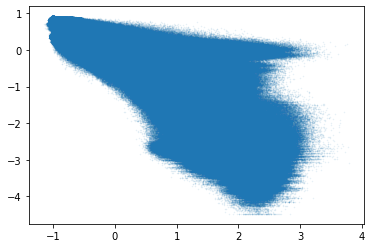

In [444]:
plt.scatter(norm[:,0], norm[:,1], s=1, marker='.', alpha=0.1)

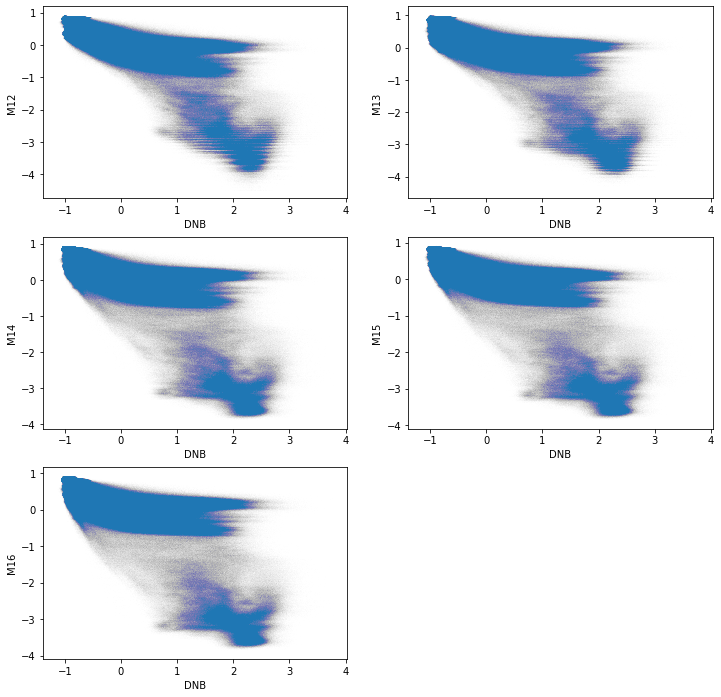

In [486]:
plt.figure(figsize=(12,12))
for i in range(1, 6):
    plt.subplot(3, 2, i)
    plt.scatter(norm[:,0], norm[:,i], s=0.5, marker='.', alpha=0.002)
    plt.xlabel('DNB')
    plt.ylabel(f'M{i + 11}')

M12 > -1 is 89.6% of total points
M13 > -1 is 89.6% of total points
M14 > -1 is 89.4% of total points
M15 > -1 is 89.3% of total points
M16 > -1 is 89.2% of total points


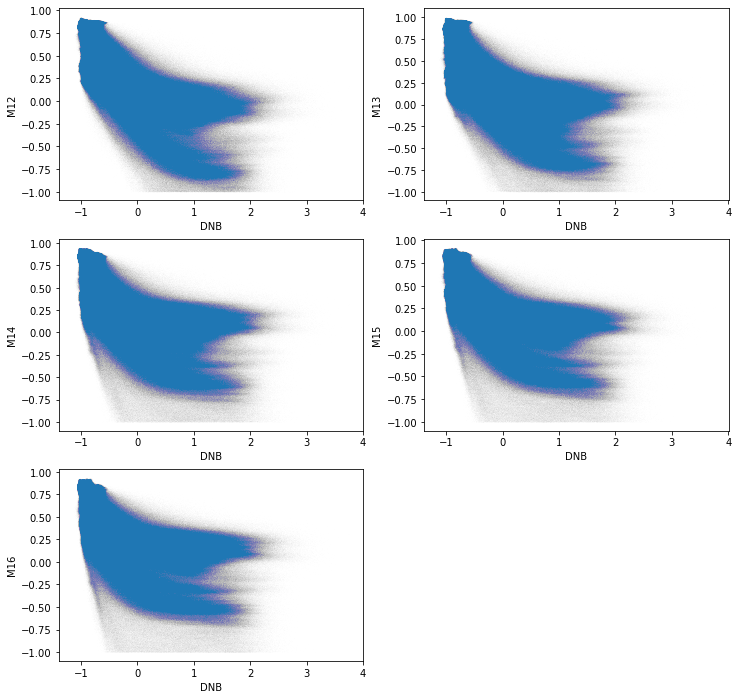

In [489]:
plt.figure(figsize=(12,12))
for i in range(1, 6):
    plt.subplot(3, 2, i)
    mband = norm[:,i]
    top_cluster = mband > -1
    dnb_top, m_top = norm[:,0][top_cluster], mband[top_cluster]
    print(f'M{i + 11} > -1 is {m_top.size * 100 / mband.size:.1f}% of total points')
    plt.scatter(dnb_top, m_top, s=0.5, marker='.', alpha=0.002)
    plt.xlabel('DNB')
    plt.ylabel(f'M{i + 11}')

In [ ]:
from sklearn.decomposition import PCA
print(A)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)

In [34]:
x = case['DNB'] * 1e5
print(f'DNB min/med/max {x.min():.2f}/{np.median(x):.2f}/{x.max():.2f}')
#print(f'DNB min/med/max {x.min():.2e}/{np.median(x):.2e}/{x.max():.2e}')
print(f'DNB mean/std {x.mean():.2f}/{x.std():.2f}')
for ci in range(12, 17):
    c = f'M{ci}'
    x = case[c]
    print(f'{c} min/med/max {x.min():.1f}/{np.median(x):.1f}/{x.max():.1f}')
    print(f'{c} mean/std {x.mean():.1f}/{x.std():.1f}')

DNB min/med/max 0.56/7.34/44.74
DNB mean/std 10.81/8.97
M12 min/med/max 203.0/286.2/297.7
M12 mean/std 281.5/17.5
M13 min/med/max 204.6/282.2/294.5
M13 mean/std 277.8/16.6
M14 min/med/max 211.1/282.4/294.1
M14 mean/std 277.8/17.2
M15 min/med/max 210.8/284.7/296.4
M15 mean/std 279.9/17.9
M16 min/med/max 210.6/283.9/295.5
M16 mean/std 278.9/17.8


In [4]:
!ls -lh

total 7.7G
-rw-rw-r-- 1 cole cole 155K Apr  3 16:22 analysis.ipynb
-rw-rw-r-- 1 cole cole 4.9G Mar 30 12:39 case_norm.npz
-rw-rw-r-- 1 cole cole 1.2G Mar 30 13:42 case.npz
drwxrwxr-x 2 cole cole 4.0K Mar 30 11:52 colocated
drwxrwxr-x 2 cole cole 4.0K Apr  1 11:30 COLOCATED
-rw-rw-r-- 1 cole cole  564 Apr  1 20:27 grad.png
-rw-rw-r-- 1 cole cole  536 Mar 30 12:53 learning_channels.txt
-rw-rw-r-- 1 cole cole 1.8G Mar 30 12:53 learn.npz
-rw-rw-r-- 1 cole cole 5.3M Apr  2 13:19 m13-8bit.png
drwxrwxr-x 4 cole cole 4.0K Mar 30 15:49 ML_INPUT
-rw-r--r-- 1 cole cole  12K Mar 30 11:49 night2day.db
drwxrwxr-x 2 cole cole 4.0K Mar 10 13:09 raw-data


In [5]:
case = np.load('case.npz')
case.files

['latitude',
 'longitude',
 'DNB',
 'M12',
 'M13',
 'M14',
 'M15',
 'M16',
 'channels',
 'samples']

In [9]:
case['M16'].shape

(3, 3056, 4056)

Steps:
* Pull out relevant channels, throw away first time-step (has NaNs)
* Flatten and combine into X Mbands (n x 5) and Y DNB (n x 1)
* 

In [1]:
from sklearn.decomposition import PCA
print(A)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)

In [2]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',
                       usecols=range(15), na_values=-200)
data = data.dropna(axis=0)

In [3]:
hours = [int(t[:2]) for t in data['Time']]
X = np.array(hours).reshape((-1, 1))

In [4]:
CO = data['CO(GT)']
T = np.array(CO).reshape((-1, 1))

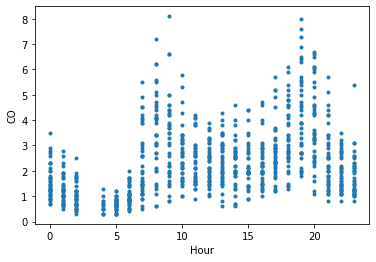

In [5]:
plt.plot(X, T, '.')
plt.xlabel('Hour')
plt.ylabel('CO');

The following function uses Horner's method to evaluate a polynomial (given by the weights) at an array of `x` values.
$$f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_{p-1} x^{p-1}$$

In [6]:
def polynomial_model(X, W):
    w = [a[0] for a in reversed(W)]
    Y = np.full(X.shape, w[0])
    for wi in w[1:]:
        Y = Y * X + wi
    return Y

The `x_powers` function creates an explicit matrix of all powers for each `x` value. We can define an alternate implementation of `polynomial_model` using this explicit matrix. But importantly it is needed by `polynomial_gradient` below.

In [7]:
def x_powers(X, n_powers):
    cols = [np.ones_like(X)]
    for i in range(n_powers - 1):
        cols.append(cols[-1] * X)
    return np.hstack(cols)

def polynomial_model2(X, W):
    return x_powers(X, len(W)) @ W

The function `polynomial_gradient` computes the gradient for each weight, in terms of the squared errors.
$$\nabla_W E = [1,\; X,\; X^2,\; X^3,\; \ldots,\; X^{p-1}]^T \;(-2)\; (T - Y) \;/\; \text{n_samples}$$

In [8]:
def polynomial_gradient(X, T, W):
    powers = x_powers(X, len(W))
    Y = polynomial_model(X, W) # equivalent to: Y = powers @ W
    errors = T - Y
    unscaled_gradient = powers.T @ (-2 * errors)
    return unscaled_gradient / len(X)

In [9]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

def rmse(model, X, T, W):
    Y = model(X, W)
    errors = T - Y
    return np.sqrt(np.mean(errors**2))

Now, we fit a polynomial model to the air quality data, and analyze the results.

In [10]:
n_powers = 3
W = np.zeros((n_powers, 1))  # Initial weights
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W
W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)
print('Steps: {}'.format(n_steps))
print('Weights: {}'.format(np.array2string(W.flatten(), precision=4)))
print('RMSE final: {:.3f}, max: {:.3f}'.format(error_sequence[-1], max(error_sequence)))

Steps: 100
Weights: [ 0.5559  0.2359 -0.0061]
RMSE final: 1.299, max: 2.743


Plot of the weights being fit by the model, showing how they changed over the iterations.

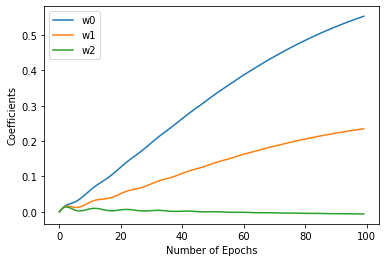

In [11]:
for wi in range(len(W)):
    ws = [a[wi] for a in W_sequence]
    plt.plot(ws, label='w{}'.format(wi))
plt.xlabel('Number of Epochs')
plt.ylabel('Coefficients')
plt.legend();

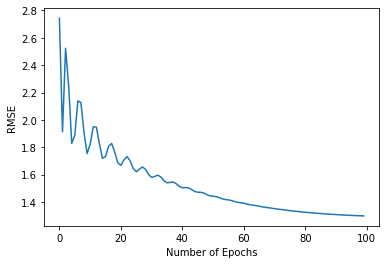

In [12]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

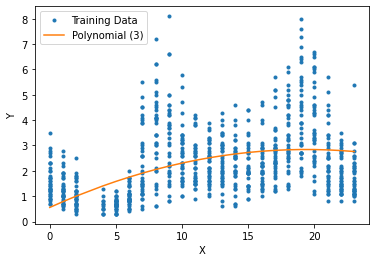

In [13]:
plt.plot(X, T, '.', label='Training Data')
unique_X = sorted(set(X.flatten()))
model_Y = np.array(unique_X).reshape((-1, 1))
plt.plot(unique_X, polynomial_model(model_Y, W), '-', label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

# Analysis
The previous three graphs show us how the model arrived at the final polynomial configuration. We see the weights starting off at initial zeros, then changing during each iteration of gradient descent. The intercept weight (weight 0) grows to about 0.5, while we see the quadratic coefficient barely moves off 0. We see the graph of RMSE is not a perfect descent, but rather jogs up and down, steadying over time. The rho learning rate influences the balance between adjusting the model quickly, and allowing for backslides in the overall error temporarily. A lower rho would dampen these ocsillations in the error, but make the model slower to converge on good weights. Finally, we see the training data overlayed with the fitted polynomial. Having a quadratic parameter improves over a linear model, but the curve is still subtle.

# Various powers and training steps
Here I experiment with variations of the above method, using polynomials of different degrees and using different numbers of steps in the iterative training process.

In [14]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights
rho = 0.01  # learning rate
n_steps = 300  # number of updates to W
W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)
print('Steps: {}'.format(n_steps))
print('Weights: {}'.format(np.array2string(W.flatten(), precision=4)))
print('RMSE final: {:.3f}, max: {:.3f}'.format(error_sequence[-1], max(error_sequence)))

Steps: 300
Weights: [ 2.3118e-02  9.0967e-03  4.1274e-03  1.5133e-03 -6.7605e-05]
RMSE final: 1.515, max: 1102.929


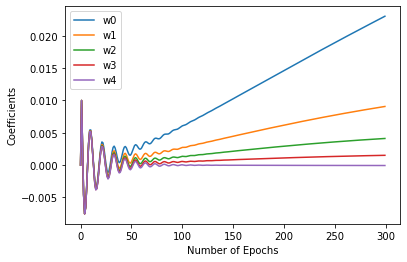

In [15]:
for wi in range(len(W)):
    ws = [a[wi] for a in W_sequence]
    plt.plot(ws, label='w{}'.format(wi))
plt.xlabel('Number of Epochs')
plt.ylabel('Coefficients')
plt.legend();

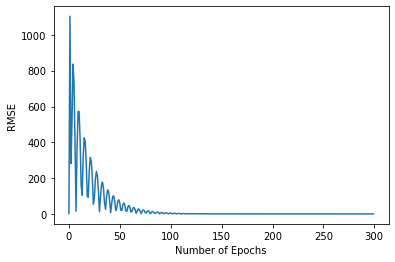

In [16]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

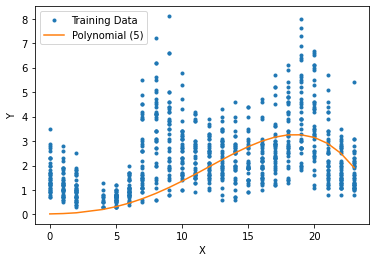

In [17]:
plt.plot(X, T, '.', label='Training Data')
unique_X = sorted(set(X.flatten()))
model_Y = np.array(unique_X).reshape((-1, 1))
plt.plot(unique_X, polynomial_model(model_Y, W), '-', label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

# Analysis, degree 5 polynomial
A fifth degree polynomial ultimately did not achieve as good a RMSE as a degree 3. And it took many more steps to stabilize to a relatively low error. However, the plot above shows it creates a more nuanced curve, turning down at the end of the day after having risen up towards the 7pm peak. Especially since it did not achieve a better RMSE score than the degree 3, this model is ultimately less useful, as it is has more degrees of freedom while not achieving better fit. Simpler polynomials are better, all things being equal.

I repeated these experiments with polynomials of degree 2, 4, and 6. Although the linear model did only slightly worse than the degree 3, it trained quickly. The higher degree polynomials needed more steps to stabilize, or a slower learning rate, and did not ultimately outperform the degree 3 significantly, if at all.

# Grading

In [18]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Frederick-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)
    T = np.array([[   4.2],
                  [  -4.8],
                  [  40.2],
                  [ -50.8],
                  [ 156.2],
                  [-454.8],
                  [ 820.2],
                  [-908.8]])
    gradient = polynomial_gradient(X, T, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
    T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
    W = np.zeros((5, 1))
  